In [2]:
!pip3 install torch torchvision torchaudio

In [3]:
#!cd yolov5

In [4]:
!pip install -r yolov5/requirements.txt

In [6]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
#!python yolov5/train.py --batch 16 --epochs 200 --data dataset4.yaml --weights yolov5s.pt --workers 2

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp33/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/hosni/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-3-23 Python-3.9.19 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1650, 3897MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [8]:
img =('im4.jpg')

In [9]:
results = model(img)

In [10]:
results.print()

image 1/1: 640x640 1 Burke
Speed: 86.9ms pre-process, 76.3ms inference, 163.2ms NMS per image at shape (1, 3, 640, 640)


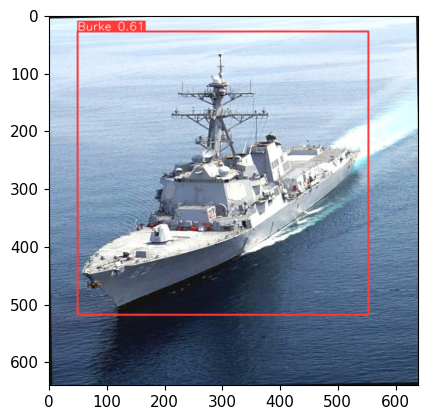

In [11]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [12]:
video_path = 'test2.mp4'
cap = cv2.VideoCapture(video_path)
ret = True
# read frames
while ret:
    ret, frame = cap.read()
    if ret:
        results = model(frame)
        #print(results)
        cv2.imshow('HOSNI',np.squeeze(results.render()))
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()